**We will do exploratory data analysis**


In [34]:
#importing all necessary libaries at the top
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
import matplotlib.image as pltimage
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier #importing Decision Tree Classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [35]:
df = pd.read_csv('apple_quality.csv')
df.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    39  1.286738  2.429525   0.956133     1.477542   4.786376  3.382357   
1    79  2.167462  1.729668   1.292344     2.343027   0.313248  0.907590   
2   119  0.591987  2.618652   1.073479     1.114681   2.536375  1.754758   
3   159  0.008339  0.258309   0.589022     2.216559   2.347407  0.439728   
4   199  3.976937  1.876774   0.103706     1.482254   0.416407  1.765281   

    Acidity Quality  
0  2.519347    good  
1  1.787447     bad  
2  1.660639     bad  
3  4.797639    good  
4  2.718979     bad

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         100 non-null    int64  
 1   Size         100 non-null    float64
 2   Weight       100 non-null    float64
 3   Sweetness    100 non-null    float64
 4   Crunchiness  100 non-null    float64
 5   Juiciness    100 non-null    float64
 6   Ripeness     100 non-null    float64
 7   Acidity      100 non-null    float64
 8   Quality      100 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     39  1.286738  2.429525   0.956133     1.477542   4.786376  3.382357   
1     79  2.167462  1.729668   1.292344     2.343027   0.313248  0.907590   
2    119  0.591987  2.618652   1.073479     1.114681   2.536375  1.754758   
3    159  0.008339  0.258309   0.589022     2.216559   2.347407  0.439728   
4    199  3.976937  1.876774   0.103706     1.482254   0.416407  1.765281   
..   ...       ...       ...        ...          ...        ...       ...   
95  3839  1.262208  1.911969   0.601879     0.972100   2.363918  0.220316   
96  3879  1.368756  0.594596   3.014961     3.311564   1.156120  4.129005   
97  3919  1.102334  3.224132   0.778734     0.872523   0.240080  1.472499   
98  3959  0.444592  0.290374   1.973923     0.400662   2.991892  0.367348   
99  3999  0.278540  1.715505   0.121217     1.154075   1.266677  0.776571   

     Acidity Quality  
0   2.519347    good  
1   1.787447     bad  
2   1.660639     bad  
3   4.797639    good  
4   2.718979     bad  
..       ...     ...  
95  2.311175     bad  
96  5.458590    good  
97  0.458893    good  
98  0.747903     bad  
99  1.599796    good  

[100 rows x 9 columns]

In [38]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

# Print the result
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 100 rows and 9 columns.


In [39]:
#checking the null values
df.isnull().any()

A_id           False
Size           False
Weight         False
Sweetness      False
Crunchiness    False
Juiciness      False
Ripeness       False
Acidity        False
Quality        False
dtype: bool

Text(0.5, 1.0, 'Distribution of Apple Quality Categories')

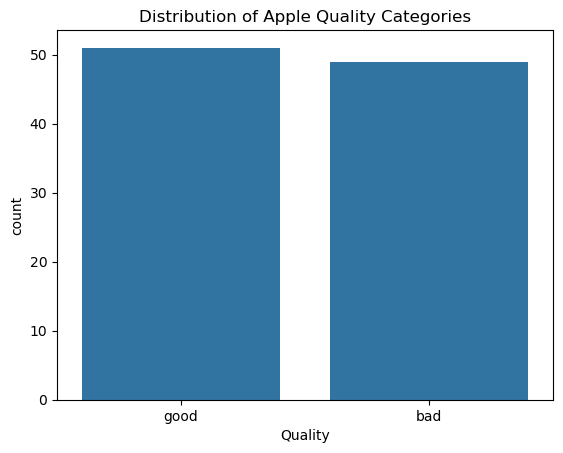

In [40]:
# Distribution of quality  
sns.countplot(x='Quality', data=df)
plt.xlabel('Quality')
plt.title('Distribution of Apple Quality Categories')

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Size'),
  Text(2, 0, 'Weight'),
  Text(3, 0, 'Sweetness'),
  Text(4, 0, 'Crunchiness'),
  Text(5, 0, 'Juiciness'),
  Text(6, 0, 'Ripeness'),
  Text(7, 0, 'Acidity')])

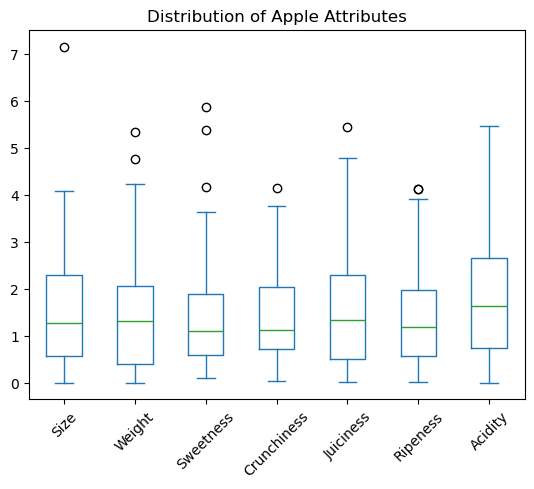

In [41]:
# Boxplots for continuous variables  
df.drop('A_id', axis=1).plot(kind='box')
plt.title('Distribution of Apple Attributes')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Correlation Heatmap')

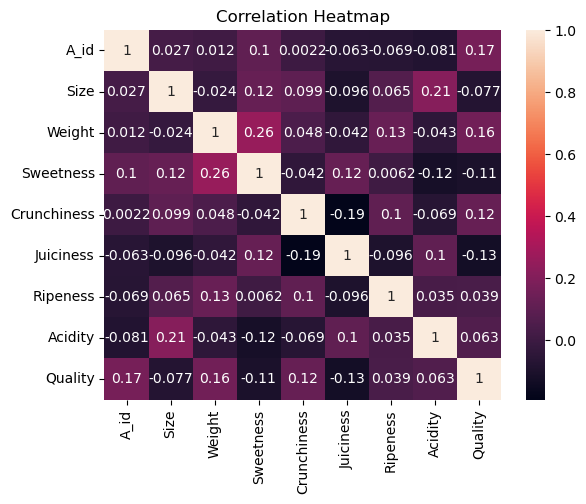

In [42]:
# Encode Quality column  
df['Quality'] = df['Quality'].map({'good':1, 'bad':0})

# Heatmap with encoded quality
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')

<Axes: xlabel='Sweetness', ylabel='Size'>

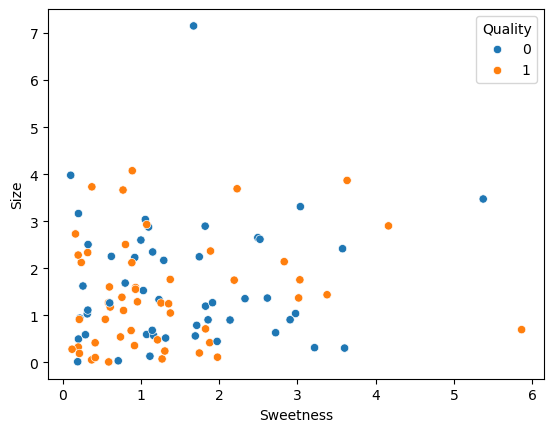

In [43]:
# Sweetness vs Size  
sns.scatterplot(x='Sweetness', y='Size', hue='Quality',
                data=df)



<Axes: xlabel='Acidity', ylabel='Ripeness'>

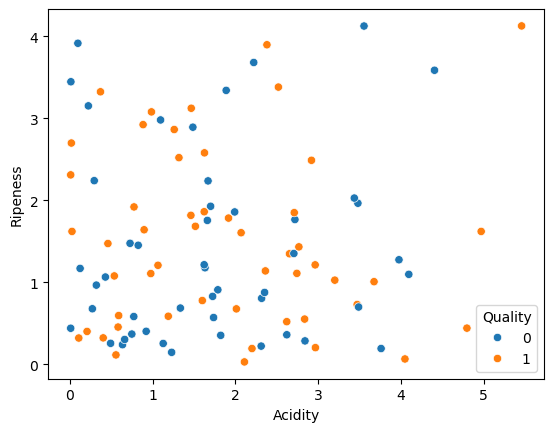

In [44]:
# Acidity vs Ripeness                    
sns.scatterplot(x='Acidity', y='Ripeness', 
                hue='Quality', data=df)

<Axes: xlabel='Quality', ylabel='Ripeness'>

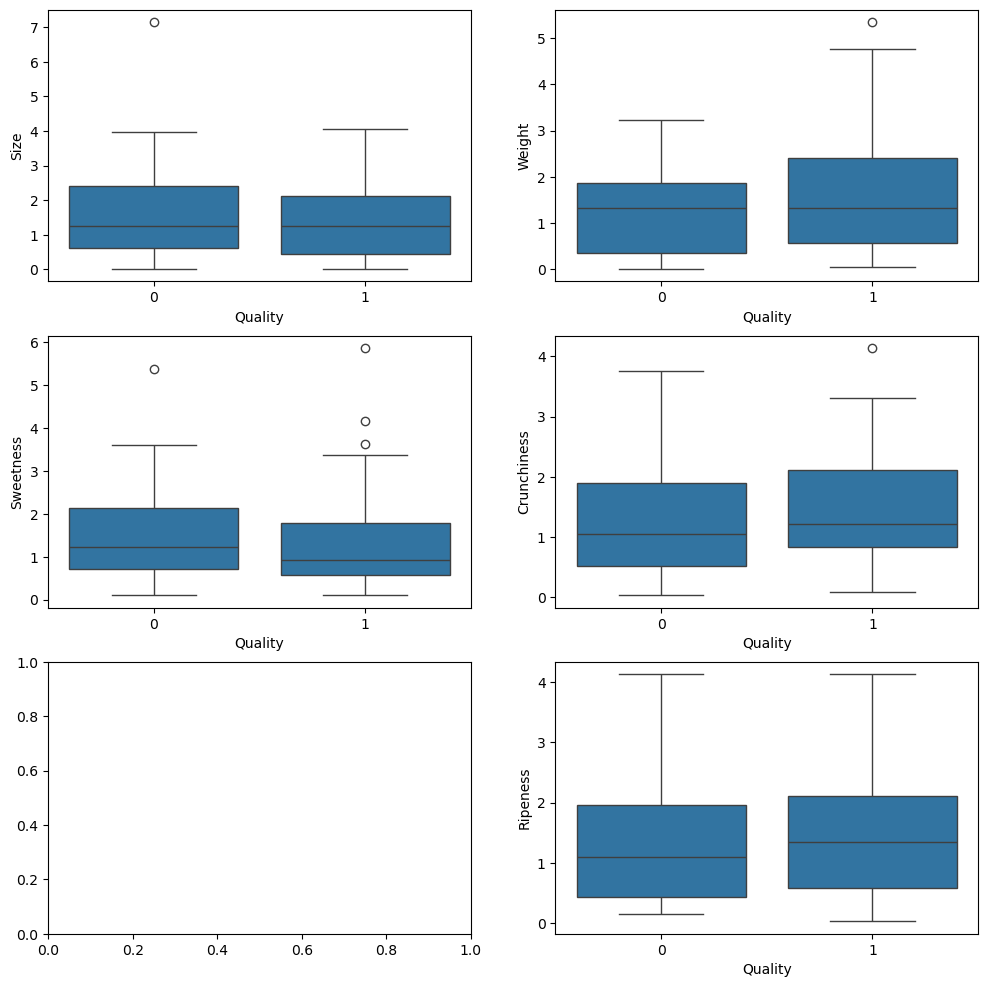

In [45]:
# Compare bad vs good apples
fig, ax = plt.subplots(3,2, figsize=(12,12))
sns.boxplot(x="Quality", y="Size", data=df, ax=ax[0,0]) 
sns.boxplot(x="Quality", y="Weight", data=df, ax=ax[0,1])

sns.boxplot(x="Quality", y="Sweetness", data=df, ax=ax[1,0])
sns.boxplot(x="Quality", y="Crunchiness", data=df, ax=ax[1,1]) 

sns.boxplot(x="Quality", y="Ripeness", data=df, ax=ax[2,1])

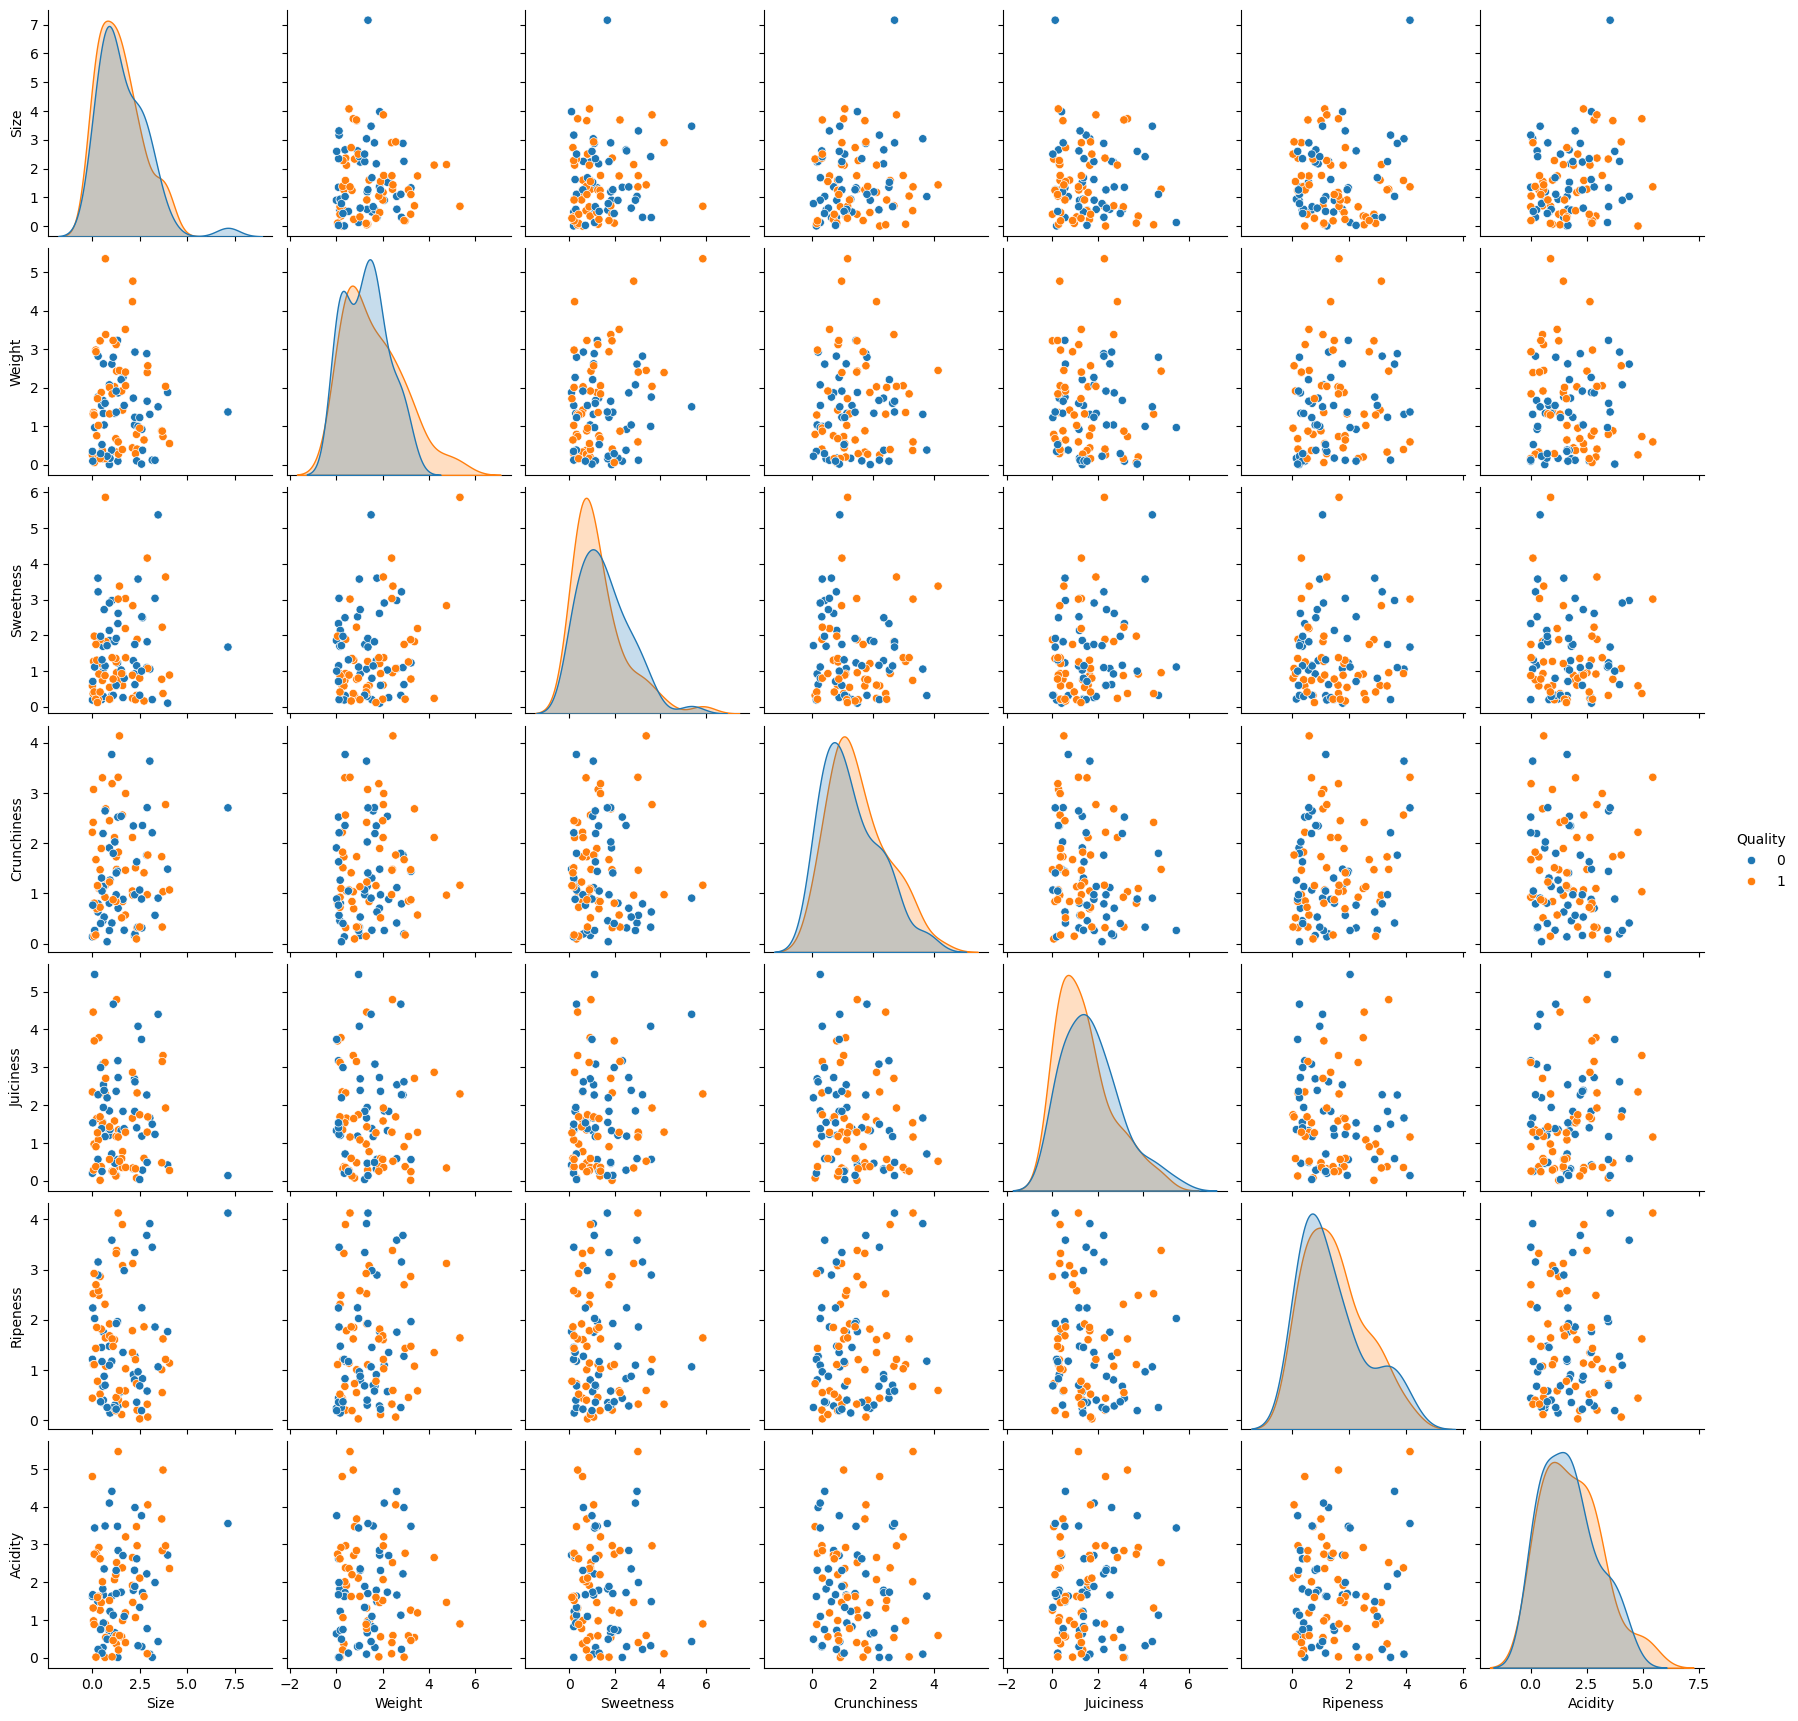

In [46]:
sns.pairplot(df.drop('A_id', axis=1), hue='Quality')

In [47]:
#splitting dataset in features and target variables
feature_cols=['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
x=df[feature_cols] #all features
y=df.Quality

In [48]:
#Now splitting the dataset into training set and test set by using function train_test_splilit
#we need to pass the 3 parameters
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.3, random_state=1)

In [49]:
print("Training split input -",  x_train.shape)
print("Testing split input-", x_test.shape)

Training split input - (30, 7)
Testing split input- (70, 7)


In [17]:
#creating decision tree classifier object
clf= DecisionTreeClassifier()

In [18]:
#Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

In [19]:
#Print Text Representation. Exporting Decision Tree to the text representation can be useful
test_representation = tree.export_text(clf)
print(test_representation)

|--- feature_2 <= 1.00
|   |--- feature_2 <= 0.35
|   |   |--- feature_1 <= 0.32
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.32
|   |   |   |--- class: 0
|   |--- feature_2 >  0.35
|   |   |--- class: 1
|--- feature_2 >  1.00
|   |--- feature_1 <= 1.90
|   |   |--- feature_0 <= 0.21
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.21
|   |   |   |--- class: 0
|   |--- feature_1 >  1.90
|   |   |--- feature_2 <= 1.30
|   |   |   |--- class: 0
|   |   |--- feature_2 >  1.30
|   |   |   |--- class: 1



In [59]:
#plotting the tree

fig = plt.figure(figsize=(200,150))
_ = tree.plot_tree(clf, feature_names = feature_cols, filled= True)

In [50]:
print("Training split input -",  x_train.shape)
print("Testing split input-", x_test.shape)
print("Testing split output-", y_test.shape)

Training split input - (30, 7)
Testing split input- (70, 7)
Testing split output- (70,)


In [51]:
y_pred = clf.predict(x_test)

In [52]:
print(y_pred)

[0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1]


In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6142857142857143


In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [55]:
print("Training split input -",  x_train.shape)
print("Testing split input-", x_test.shape)
print("Testing split output-", y_test.shape)

Training split input - (80, 7)
Testing split input- (20, 7)
Testing split output- (20,)


In [56]:
y_pred = clf.predict(x_test)

In [57]:
print(y_pred)

[1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0]


In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
